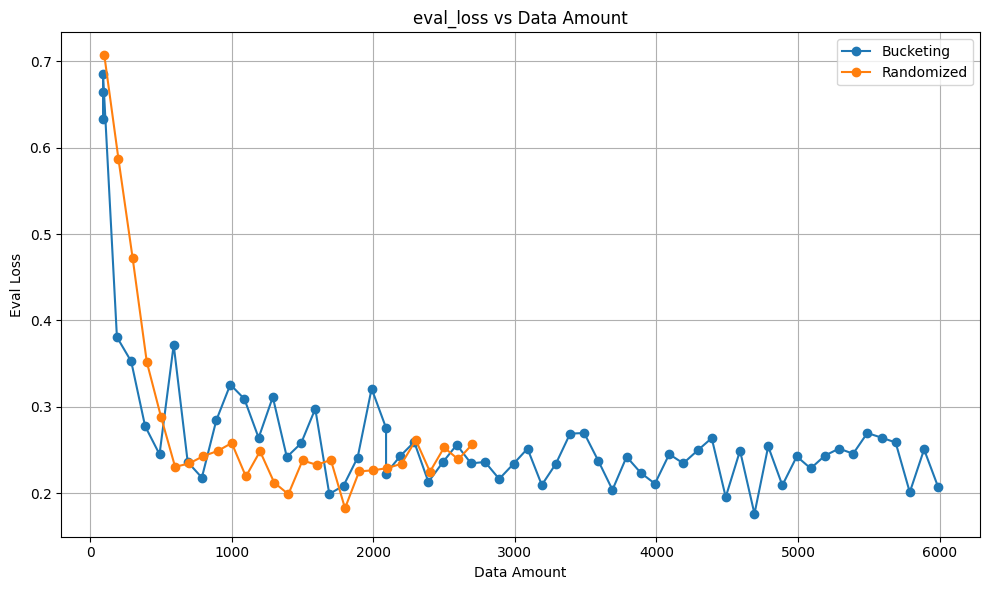

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
excel_file = "results.xlsx"  # path to your file
metric = "eval_loss"     # change this to any column you want to plot

# === LOAD DATA ===
df = pd.read_excel(excel_file)

# Ensure numeric values (in case of commas instead of dots)
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = df[col].str.replace(",", ".").astype(float)
        except Exception:
            pass

# === PLOT ===
plt.figure(figsize=(10, 6))


# Plot each method separately
for method, subset in df.groupby("method"):
    plt.plot(
        subset["data_amount"],
        subset[metric],
        marker="o",
        label=method
    )

plt.title(f"{metric} vs Data Amount")
plt.xlabel("Data Amount")
plt.ylabel(metric.replace("_", " ").title())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
